In [9]:
from input_proc import *
import numpy as np
from os import path
import matplotlib.pyplot as plt
def get_data(inputfile, var):
    dic = {}
    sim = proc_inputfile(inputfile)
    filename = sim.calc_dir + '/' + sim.calc_dir
    foldername = sim.calc_dir
    print(filename)
    resN = np.loadtxt(filename + '_resN.csv', delimiter=",", dtype=complex)
    nsamples = int(np.round(np.real(resN[0])))
    dic.__setitem__('nsamples', nsamples)
    dic.__setitem__('basis',sim.basis)
    dic.__setitem__('kgrid', np.loadtxt(filename + '_kgrid.csv', delimiter=","))
    # print(os.listdir(pre+foldername))
    #kgrid = np.loadtxt(pre + foldername + '/kgrid.csv', delimiter=",")
    #epsilon_c = np.loadtxt(pre + foldername + '/epsilon_c.csv', delimiter=",")
    #epsilon_v = np.loadtxt(pre + foldername + '/epsilon_v.csv', delimiter=",")
    dic.__setitem__('foldername',foldername)
    #dic.__setitem__('epsilon_c', epsilon_c)
    #dic.__setitem__('epsilon_v', epsilon_v)
    #dic.__setitem__('kgrid', kgrid)
    #dic.__setitem__('num_of_states', len(kgrid))
    dic.__setitem__('dt', sim.dt)
    #num_of_states = len(kgrid)
    #e_id = np.array(list(itertools.product(range(num_of_states), range(num_of_states))))[:, 0]
    #h_id = np.array(list(itertools.product(range(num_of_states), range(num_of_states))))[:, 1]
    #dic.__setitem__('e_id', e_id)
    #dic.__setitem__('h_id', h_id)
    dic.__setitem__('foldername', foldername)
    print(nsamples)

    def add_data(varname):
        if path.exists(filename + '_' + varname + '.csv'):
            dic.__setitem__(varname, np.loadtxt(filename + '_' + varname + '.csv', delimiter=",") / nsamples)
        return

    for name in ['resC', 'resFc', 'resCdb', 'resFcdb', 'resCadb', 'resFcadb', 'resT', 'resTe', 'resN', 'resEq', 'resEc',
                 'resEqc', 'resPopA', 'resEv', 'resPopB', 'resFcpopB','resPopBEX','resCdbEX']:
        add_data(name)
    #if basis == 'exciton':
    #    dic.__setitem__('resPopBEX',np.load(filename+'_resPopBEX.npy'))
    #    dic.__setitem__('resCdbEX', np.load(filename + '_resCdbEX.npy'))
    if path.exists(filename + '_' + 'resCdbK' + '.csv'):
        dic.__setitem__('resCdbK', np.loadtxt(filename + '_' + 'resCdbK.csv', delimiter=',') / nsamples)
    if path.exists(filename + '_resRhodb.npy'):
        dic.__setitem__('resRhodb', np.load(filename + '_resRhodb.npy') / nsamples)
    kB = 1
    def pop(egrid):
        z = sum(np.exp(-1.0 * (1 / (kB * sim.temp)) * egrid))
        return np.exp(-1.0 * (1 / (kB * sim.temp)) * egrid) / z

    #def optical_pops(runCdb):
    #    optical_pops = np.sum(np.abs(runCdb[:, (e_id == h_id)]), axis=1)
    #    return optical_pops

    e_spin_block_list = np.load(sim.exciton_dir + '/e_spin_block_list.npy')
    h_spin_block_list = np.load(sim.exciton_dir + '/h_spin_block_list.npy')
    e_tau_block_list = np.load(sim.exciton_dir + '/e_tau_block_list.npy')
    h_tau_block_list = np.load(sim.exciton_dir + '/h_tau_block_list.npy')

    dic.__setitem__('e_spin',e_spin_block_list)
    dic.__setitem__('h_spin',h_spin_block_list)
    dic.__setitem__('e_tau',e_tau_block_list)
    dic.__setitem__('h_tau',h_tau_block_list)

    dic.__setitem__('resTps', dic['resT'] * .163797)
    return [np.real(dic[v]) for v in var]

MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_100_0_FSSH/MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_100_0_FSSH
1


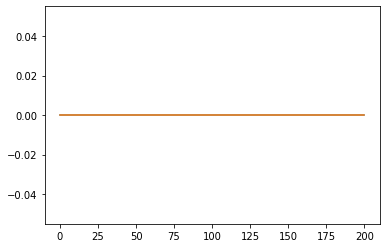

In [10]:
runEq, runEc, runT_0, runCdbEX_0, runPopBEX_0 = get_data("inputfile", ['resEq','resEc','resTps','resCdbEX','resPopBEX'])
plt.plot(runEq-runEq[0])
plt.plot(runEc-runEc[0])

MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_0_FSSH/MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_0_FSSH
1
MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_0.003_FSSH/MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_0.003_FSSH
1000
MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_0.01_FSSH/MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_0.01_FSSH
1000
MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_0.03_FSSH/MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_0.03_FSSH
1000
MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_0.1_FSSH/MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_0.1_FSSH
1000
MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_0.3_FSSH/MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_0.3_FSSH
1000
MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_1.0_FSSH/MoS2_33_tb_1opt_rad_0.1_K1_K2_60_0.1_0.02_exciton_100_1.0_FSSH
1000


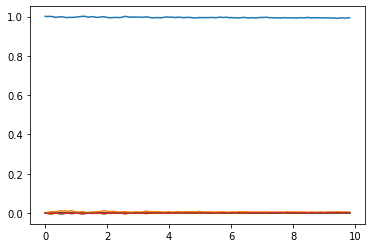

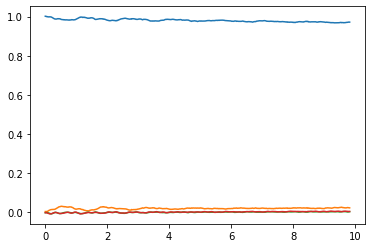

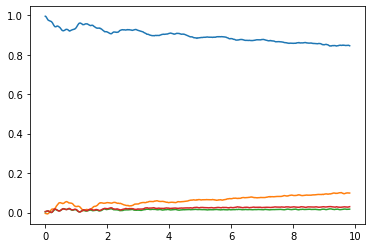

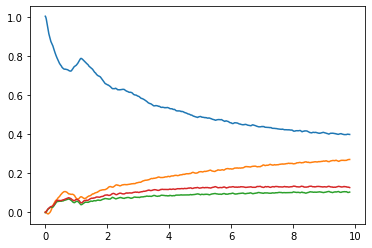

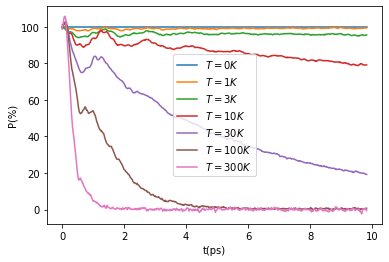

In [37]:
runT_0, runCdbEX_0, runPopBEX_0 = get_data("N100_T0", ['resTps','resCdbEX','resPopBEX'])
runT_0003, runCdbEX_0003, runPopBEX_0003 = get_data("N100_T0.003", ['resTps','resCdbEX','resPopBEX'])
runT_001, runCdbEX_001, runPopBEX_001 = get_data("N100_T0.01", ['resTps','resCdbEX','resPopBEX'])
runT_003, runCdbEX_003, runPopBEX_003 = get_data("N100_T0.03", ['resTps','resCdbEX','resPopBEX'])
runT_01, runCdbEX_01, runPopBEX_01 = get_data("N100_T0.1", ['resTps','resCdbEX','resPopBEX'])
runT_03, runCdbEX_03, runPopBEX_03 = get_data("N100_T0.3", ['resTps','resCdbEX','resPopBEX'])
runT_1, runCdbEX_1, runPopBEX_1 = get_data("N100_T1.0", ['resTps','resCdbEX','resPopBEX'])

def pol(runCdbEX):
    return 100*(runCdbEX[:,0] - runCdbEX[:,1]) / (runCdbEX[:,0] + runCdbEX[:,1])

plt.plot(runT_1, runCdbEX_0[:,1], color='black')
plt.plot(runT_1, runCdbEX_0003[:,0:4])
plt.show()
plt.plot(runT_1, runCdbEX_001[:,0:4])
plt.show()
plt.plot(runT_1, runCdbEX_003[:,0:4])
plt.show()
plt.plot(runT_1, runCdbEX_01[:,0:4])
#plt.plot(runT_1, runCdbEX_03[:,1])
#plt.plot(runT_1, runCdbEX_1[:,1])
plt.show()


plt.plot(runT_0, pol(runCdbEX_0),label=r"$T=0 K$")
plt.plot(runT_0003,pol(runCdbEX_0003), label=r"$T=1 K$")
plt.plot(runT_001,pol(runCdbEX_001), label=r"$T=3 K$")
plt.plot(runT_003,pol(runCdbEX_003), label=r"$T=10 K$")
plt.plot(runT_01,pol(runCdbEX_01), label=r"$T=30 K$")
plt.plot(runT_03,pol(runCdbEX_03), label=r"$T=100 K$")
plt.plot(runT_1,pol(runCdbEX_1), label=r"$T=300 K$")
plt.legend()
plt.xlabel('t(ps)')
plt.ylabel('P(%)')
plt.savefig('temp_scan_MoS2.pdf')

plt.show()

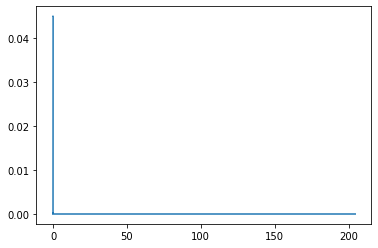

In [27]:
#plt.plot(0*runCdbEX50[-1] - runPopBEX50[-1])
#plt.plot(0*runCdbEX100[-1] - runPopBEX100[-1])
#plt.plot(0*runCdbEX150[-1]-runPopBEX150[-1])
plt.plot(runCdbEX200[-1], runPopBEX200[-1])
plt.hlines(0,-1,205)
plt.show()

MoS2_33_tb_1opt_rad_0.2_K1_K2_20_0.1_0.02_exciton_50_FSSH/MoS2_33_tb_1opt_rad_0.2_K1_K2_20_0.1_0.02_exciton_50_FSSH
350


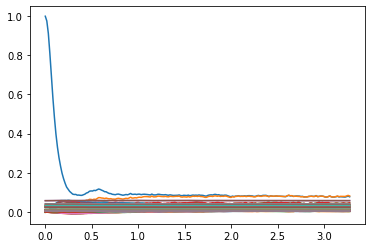

MoS2_33_tb_1opt_rad_0.2_K1_K2_20_0.1_0.02_exciton_100_FSSH/MoS2_33_tb_1opt_rad_0.2_K1_K2_20_0.1_0.02_exciton_100_FSSH
200


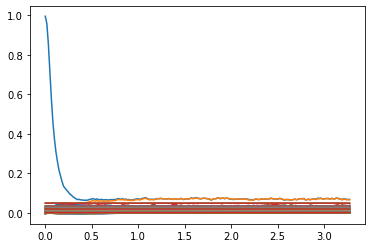

MoS2_33_tb_1opt_rad_0.2_K1_K2_20_0.1_0.02_exciton_150_FSSH/MoS2_33_tb_1opt_rad_0.2_K1_K2_20_0.1_0.02_exciton_150_FSSH
200


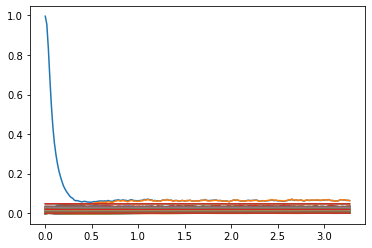

MoS2_33_tb_1opt_rad_0.2_K1_K2_20_0.1_0.02_exciton_200_FSSH/MoS2_33_tb_1opt_rad_0.2_K1_K2_20_0.1_0.02_exciton_200_FSSH
200


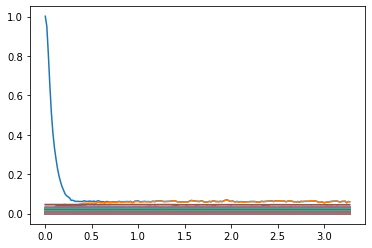

In [22]:
inputfile = "MoS2_33_tb_1opt_rad_0.2_K1_K2_20_0.1_0.02_exciton_50_FSSH/inputfile"
runT50, runCdbEX50, runPopBEX50 = get_data(inputfile, ['resTps','resCdbEX','resPopBEX'])
plt.plot(runT50, runCdbEX50)
plt.plot(runT50, runPopBEX50)
plt.show()
inputfile = "MoS2_33_tb_1opt_rad_0.2_K1_K2_20_0.1_0.02_exciton_100_FSSH/inputfile"
runT100, runCdbEX100, runPopBEX100 = get_data(inputfile, ['resTps','resCdbEX','resPopBEX'])
plt.plot(runT100, runCdbEX100)
plt.plot(runT100, runPopBEX100)
plt.show()
inputfile = "MoS2_33_tb_1opt_rad_0.2_K1_K2_20_0.1_0.02_exciton_150_FSSH/inputfile"
runT150, runCdbEX150, runPopBEX150 = get_data(inputfile, ['resTps','resCdbEX','resPopBEX'])
plt.plot(runT150, runCdbEX150)
plt.plot(runT150, runPopBEX150)
plt.show()
inputfile = "MoS2_33_tb_1opt_rad_0.2_K1_K2_20_0.1_0.02_exciton_200_FSSH/inputfile"
runT200, runCdbEX200, runPopBEX200 = get_data(inputfile, ['resTps','resCdbEX','resPopBEX'])
plt.plot(runT200, runCdbEX200)
plt.plot(runT200, runPopBEX200)
plt.show()

MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_50_FSSH/MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_50_FSSH
500


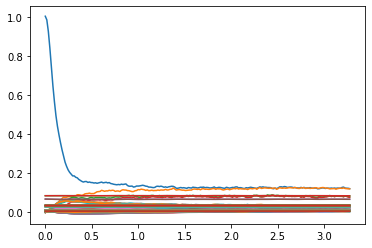

MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_100_FSSH/MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_100_FSSH
500


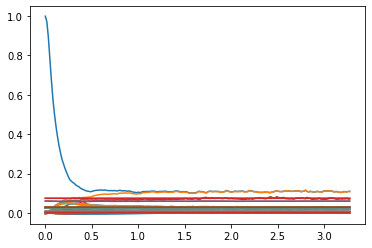

MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_150_FSSH/MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_150_FSSH
500


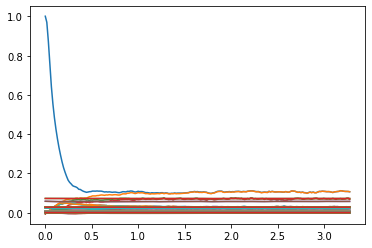

MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_200_FSSH/MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_200_FSSH
500


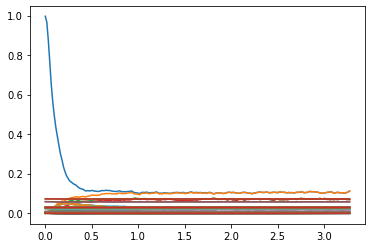

In [6]:
inputfile = "MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_50_FSSH/inputfile"
runEc, runEq, runT, runCdbEX, runPopBEX = get_data(inputfile, ['resEc','resEq','resTps','resCdbEX','resPopBEX'])
plt.plot(runT, runCdbEX)
plt.plot(runT, runPopBEX)
plt.show()
inputfile = "MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_100_FSSH/inputfile"
runEc, runEq, runT, runCdbEX, runPopBEX = get_data(inputfile, ['resEc','resEq','resTps','resCdbEX','resPopBEX'])
plt.plot(runT, runCdbEX)
plt.plot(runT, runPopBEX)
plt.show()
inputfile = "MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_150_FSSH/inputfile"
runEc, runEq, runT, runCdbEX, runPopBEX = get_data(inputfile, ['resEc','resEq','resTps','resCdbEX','resPopBEX'])
plt.plot(runT, runCdbEX)
plt.plot(runT, runPopBEX)
plt.show()
inputfile = "MoS2_33_tb_1opt_rad_0.1_K1_K2_20_0.1_0.02_exciton_200_FSSH/inputfile"
runEc, runEq, runT, runCdbEX, runPopBEX = get_data(inputfile, ['resEc','resEq','resTps','resCdbEX','resPopBEX'])
plt.plot(runT, runCdbEX)
plt.plot(runT, runPopBEX)
plt.show()

MoS2_15_tb_1opt_rad_0.1_K1_K2_10_0.1_0.02_kspace_FSSH/MoS2_15_tb_1opt_rad_0.1_K1_K2_10_0.1_0.02_kspace_FSSH
1


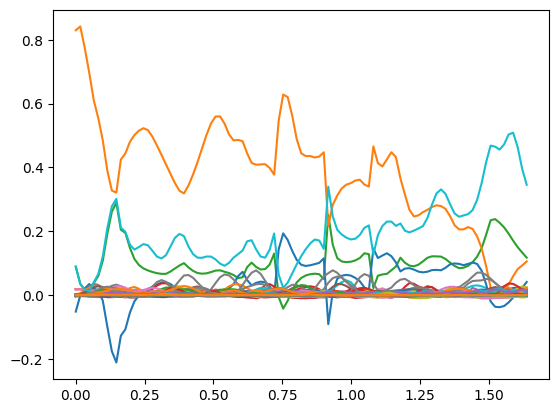

MoS2_15_tb_1opt_rad_0.1_K1_K2_10_0.1_0.02_exciton_0_FSSH/MoS2_15_tb_1opt_rad_0.1_K1_K2_10_0.1_0.02_exciton_0_FSSH
1


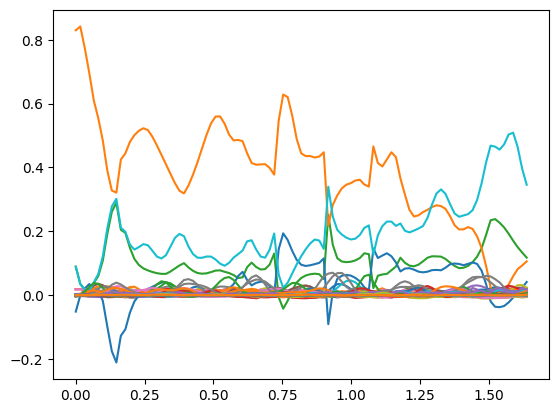

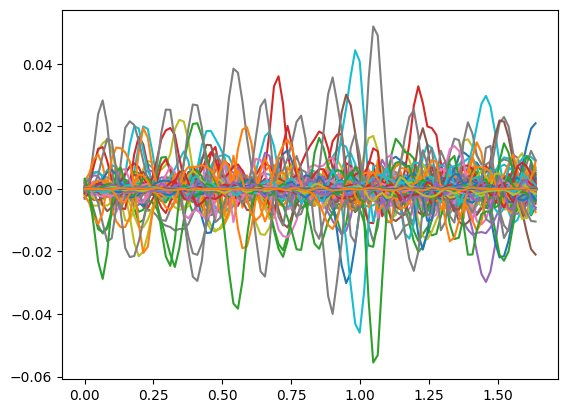

In [33]:
runEc, runEq, runT, runCdb = get_data('input_K', ['resEc','resEq','resTps','resCdb'])
plt.plot(runT, runCdb)
plt.show()
runEc, runEq, runT, runCdbEX = get_data('input_EX', ['resEc','resEq','resTps','resCdb'])
plt.plot(runT, runCdbEX)
plt.show()
plt.plot(runT, runCdb - runCdbEX)
plt.show()

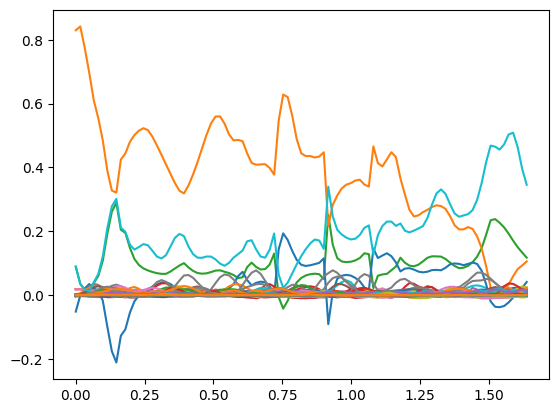

MoS2_15_tb_1opt_rad_0.1_K1_K2_10_0.1_0.02_exciton_0_FSSH/MoS2_15_tb_1opt_rad_0.1_K1_K2_10_0.1_0.02_exciton_0_FSSH
2


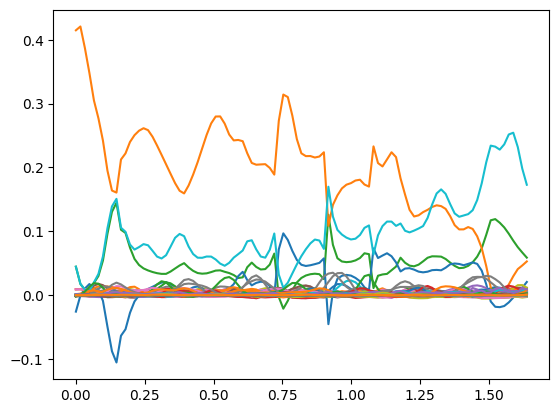

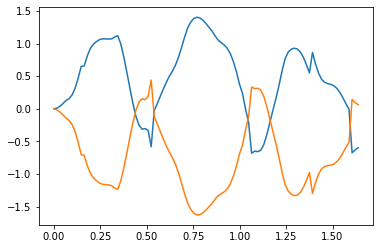

In [19]:
plt.plot(runT, runEc - runEc[0])
plt.plot(runT, runEq - runEq[0])
plt.show()